In [2]:
from IPython.display import Image
import pandas as pd

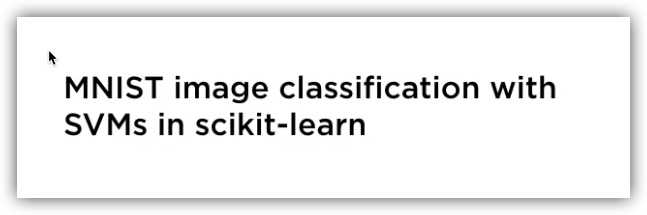

In [3]:
'''
SVMs can be used for image classification as well. In this demo, we'll see how. 
In this demo, we'll work on images from the MNIST data set. 
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Machine Learning Models in Python with scikit-learn/Image/2021-11-03_14-01-08.jpg')

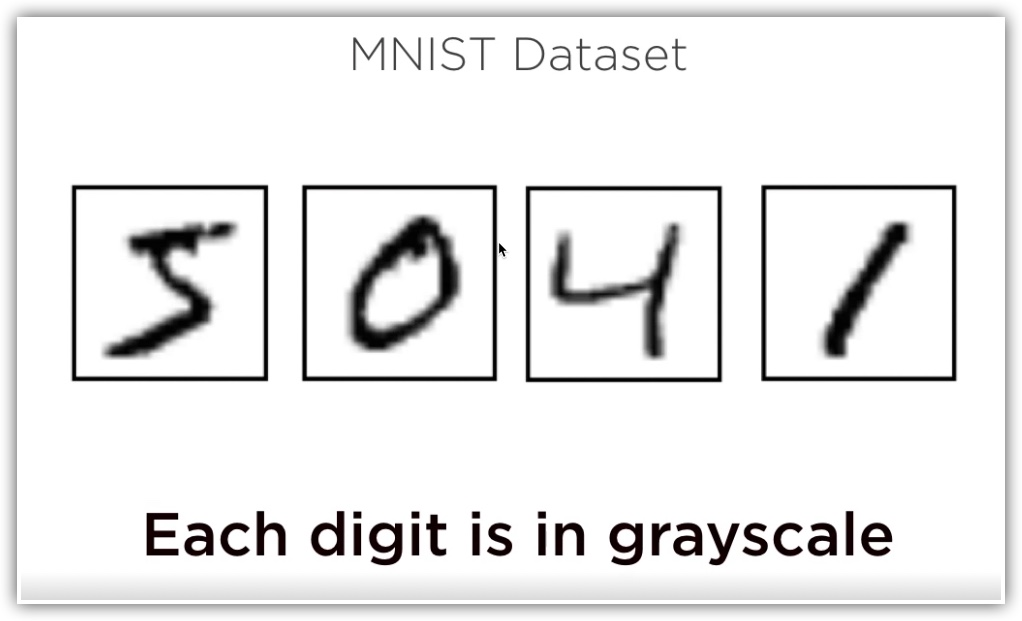

In [4]:
'''
The MNIST data set consists of images of handwritten digits where every digit is in grayscale. 
This is a very popular data set, created by Yan Lakon and it is often used by beginners when they're 
first getting into machine learning. 
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Machine Learning Models in Python with scikit-learn/Image/2021-11-03_15-26-18.jpg')

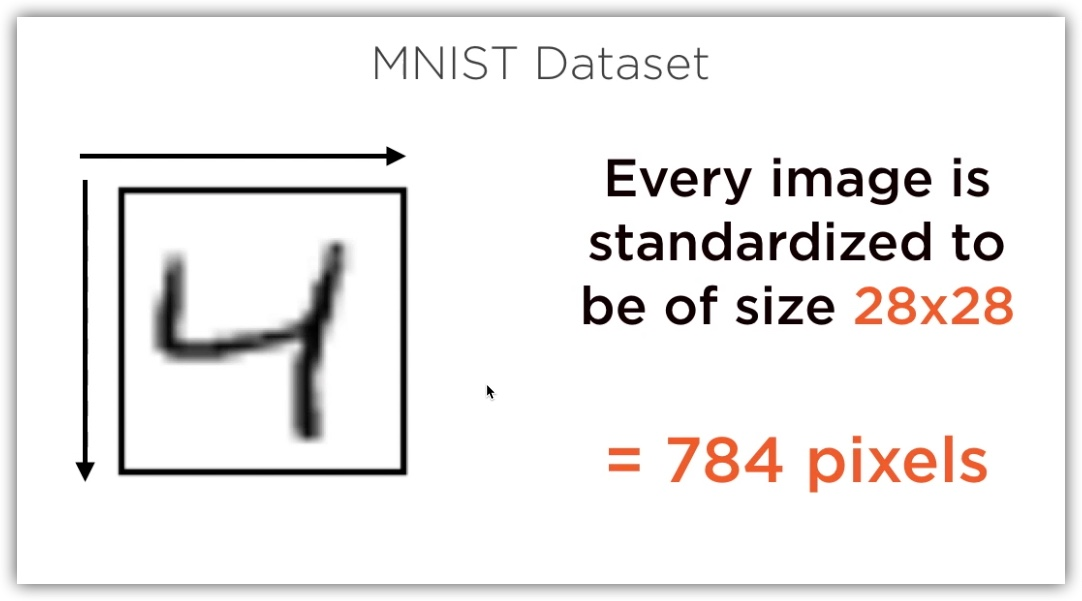

In [5]:
'''
Every image in this data set is standardized to be of size 28 x 28 containing a total of 784 pixels. 
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Machine Learning Models in Python with scikit-learn/Image/2021-11-03_15-27-25.jpg')

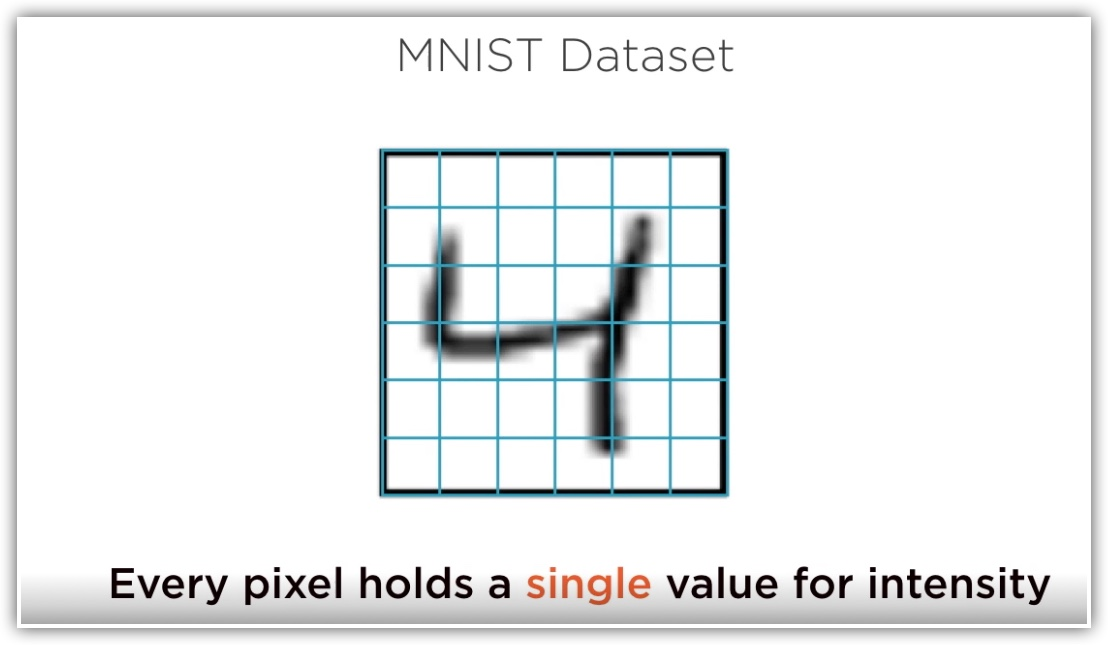

In [6]:
'''
The images are all in grayscale. These are single channel images. Every pixel holds a single value for intensity.
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Machine Learning Models in Python with scikit-learn/Image/2021-11-03_15-28-32.jpg')

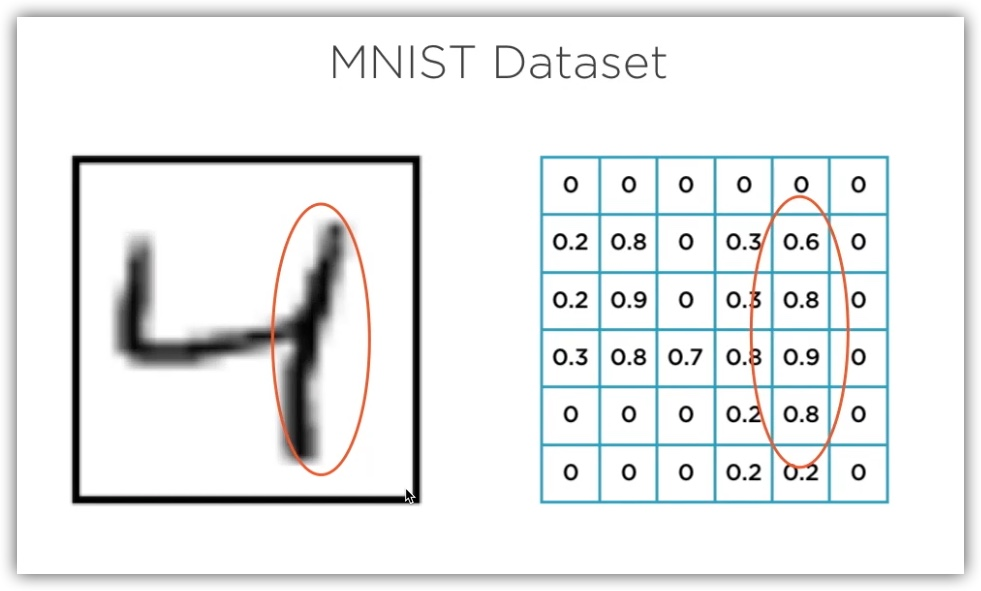

In [7]:
'''
 Here is how the digit four would be represented in the MNIST data set. 
 Notice the intensity values corresponding to the strokes of four are numbers between zero and one. 
 All other pixel intensity values are zero. 
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Machine Learning Models in Python with scikit-learn/Image/2021-11-03_15-29-18.jpg')

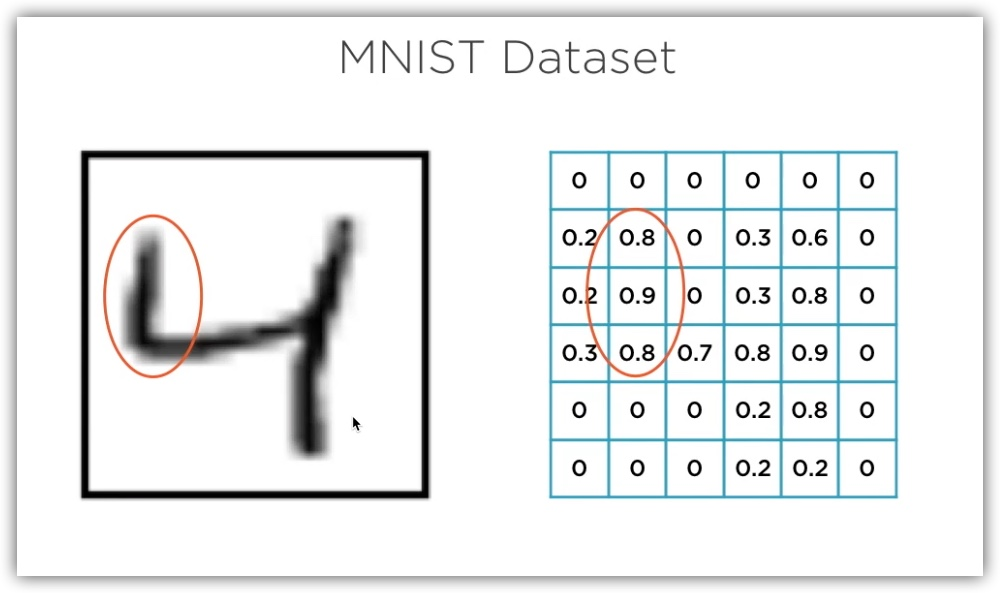

In [8]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Machine Learning Models in Python with scikit-learn/Image/2021-11-03_15-29-23.jpg')

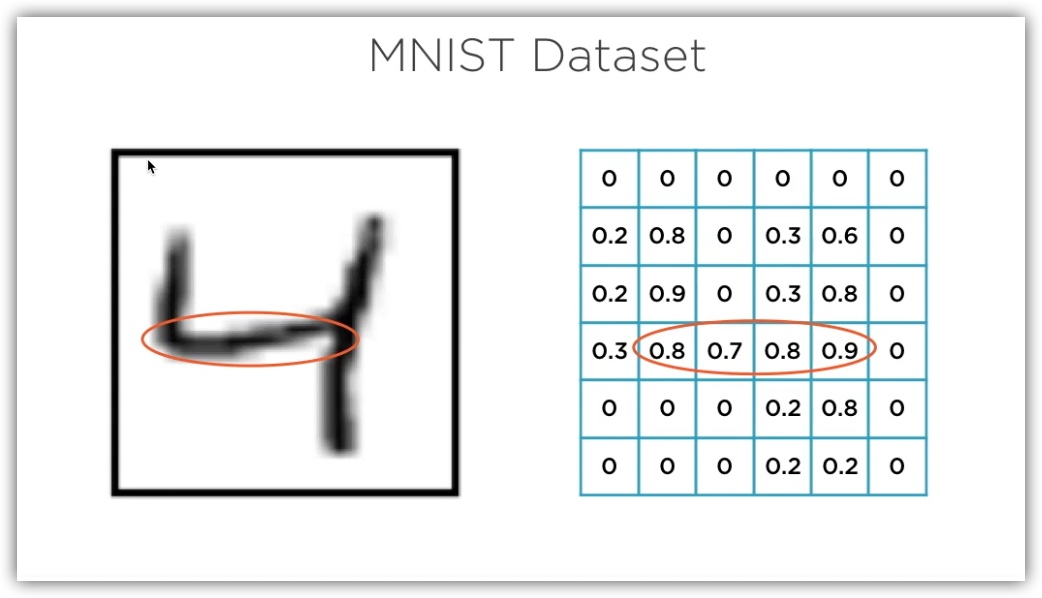

In [9]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Machine Learning Models in Python with scikit-learn/Image/2021-11-03_15-29-31.jpg')

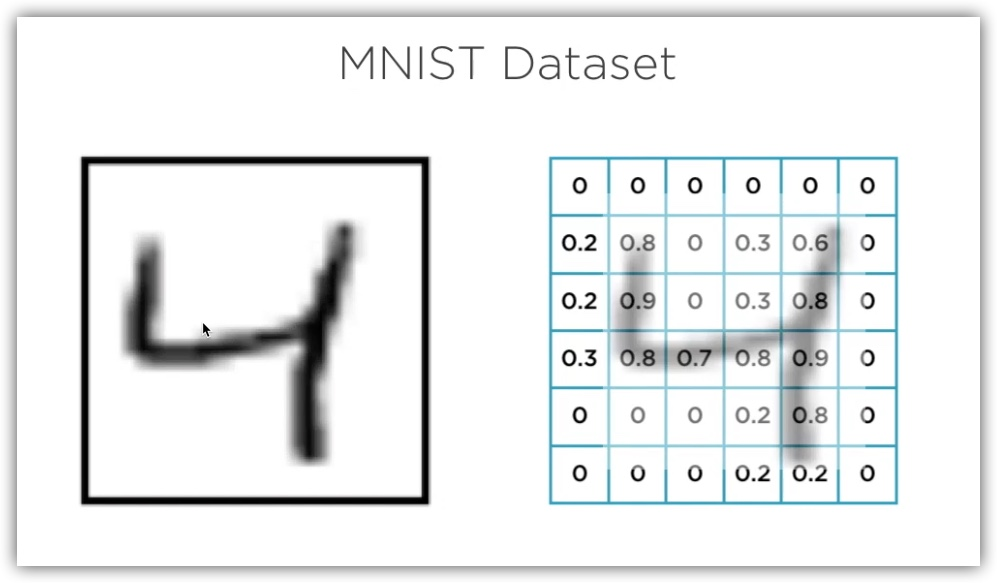

In [10]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Machine Learning Models in Python with scikit-learn/Image/2021-11-03_15-29-40.jpg')

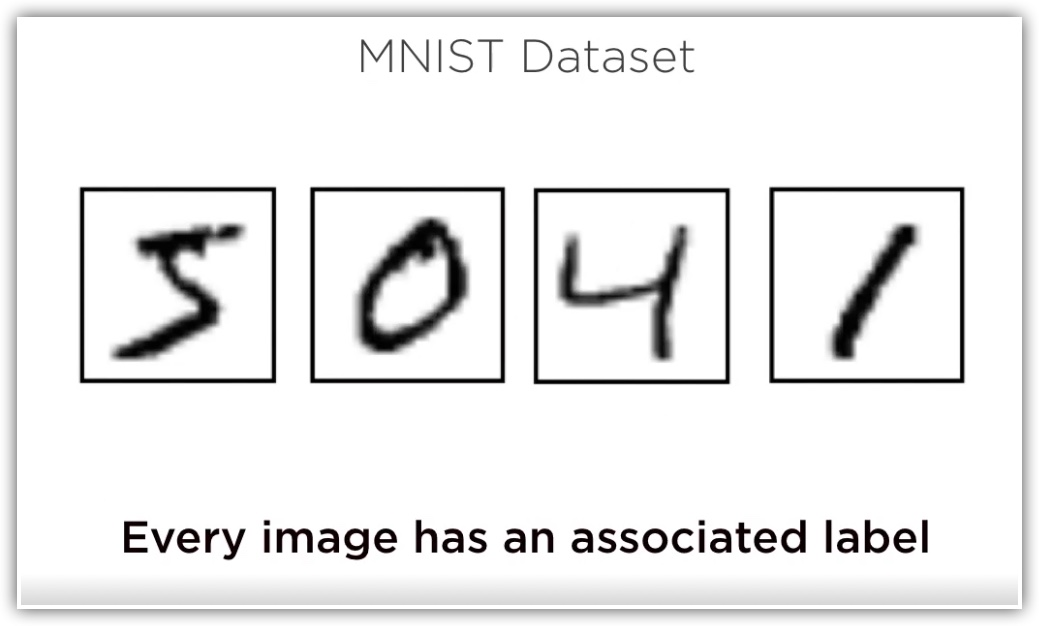

In [11]:
'''
Every image has an associated label which tells us what digit corresponds to that image. 
We'll use the support vector machine classifier to classify these MNIST images based 
on what digit they represent from zero through nine. 
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Machine Learning Models in Python with scikit-learn/Image/2021-11-03_15-32-14.jpg')

In [12]:
'''
We will use the PANDAS library as usual and read in the CSV file which contains the training data for MNIST. 
This file was originally from the Kaggle website. 

Notice the columns and the data. The first column is the label and the remaining columns 
are the pixel intensity values. 
'''
mnist_data=pd.read_csv('Data/train.csv')
mnist_data.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


https://www.kaggle.com/c/3004/download/train.csv

In [13]:
'''
Let's set up the features and labels for our machine learning models. 
The x variables are all the pixel values and the y variable is the label. 
'''
from sklearn.model_selection import train_test_split
features=mnist_data.columns[1:]
features

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [14]:
X=mnist_data[features]
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
Y=mnist_data['label']
Y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [16]:
'''
Use 10% of the data set for test, the rest for training. 
The pixel intensity values are expressed as integers between zero and 255, divide by 255 to get 
intensity values between zero and one.
'''
X_train,X_test,Y_train,y_test=train_test_split(X/255.,Y,test_size=0.1,random_state=0)

In [17]:
'''
 Instantiate the liner support vector classifier and call the fit method on it. 
 In order to run training on the MNIST data set.
'''
from sklearn.svm import LinearSVC
clf_svm = LinearSVC(penalty='l2',dual=False,tol=1e-5)
clf_svm.fit(X_train,Y_train)

LinearSVC(dual=False, tol=1e-05)

In [18]:
'''
 We'll then call predict on the test data and measure the accuracy of our predictions. 
 And the accuracy of this SVM model is 91%, that means 91% of our test instances were classified correctly. 
'''
from sklearn.metrics import accuracy_score
y_pred_svm=clf_svm.predict(X_test)
acc_svm=accuracy_score(y_test,y_pred_svm)
acc_svm

0.9102380952380953

In [26]:
'''
When your model has a number of hyper parameters, we've spoken earlier of the 

need to tune them to find the best possible model on your data set. 


Scikit-learn offers some specialized tools to perform exactly this tuning. 

It will help you choose the best possible model by using a few different values of the hyperparameters 

that you specify. This is done using the GridSearchCV. 



'''

from sklearn.model_selection import GridSearchCV
penalties=['l1','l2']
tolerances=[1e-3,1e-4,1e-5]

param_grid={'penalty':penalties,'tol':tolerances}
grid_search=GridSearchCV(LinearSVC(dual=False),param_grid,cv=3)
grid_search.fit(X_train,Y_train)
grid_search.best_params_

/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/sit

{'penalty': 'l1', 'tol': 0.001}

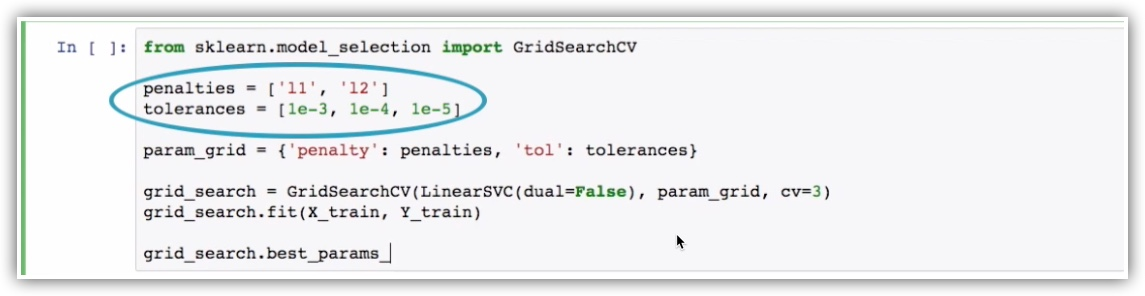

In [19]:
'''
Let's assume that we want to tweak two different parameters. 

We want the penalties of the SVM model to be either the L1 norm or the L2 norm. 

We don't know which one might be better and we want to try out three different tolerances for our model. 

Remember that this tolerance is our stopping criteria for our training.

'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Machine Learning Models in Python with scikit-learn/Image/2021-11-03_16-03-49.jpg')

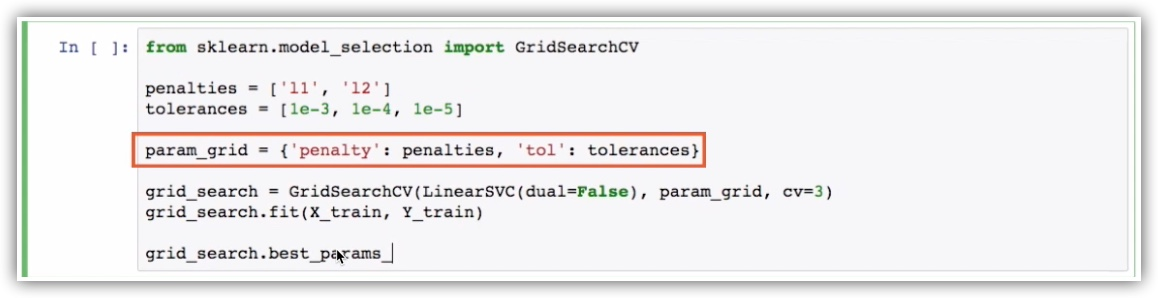

In [20]:
'''
This is called grid search because we set up a grid or a matrix specifying the 

various parameter values that we want to use.
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Machine Learning Models in Python with scikit-learn/Image/2021-11-03_16-04-33.jpg')

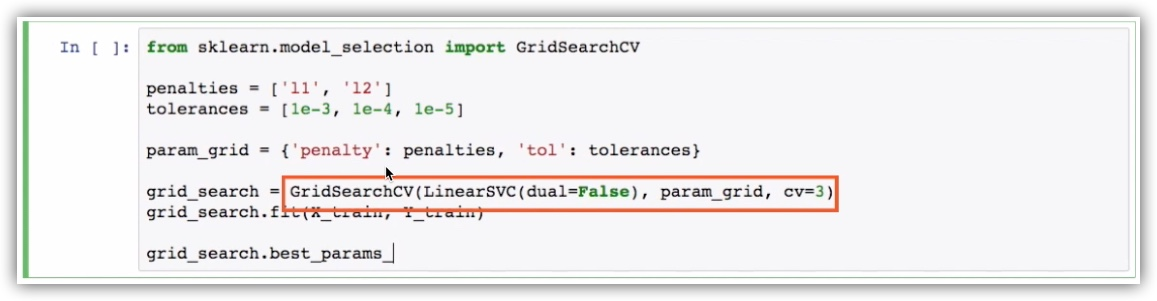

In [21]:
'''
Instantiate a GridSearchCV estimator and pass in a LinearSVC estimator within it.
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Machine Learning Models in Python with scikit-learn/Image/2021-11-03_16-05-04.jpg')

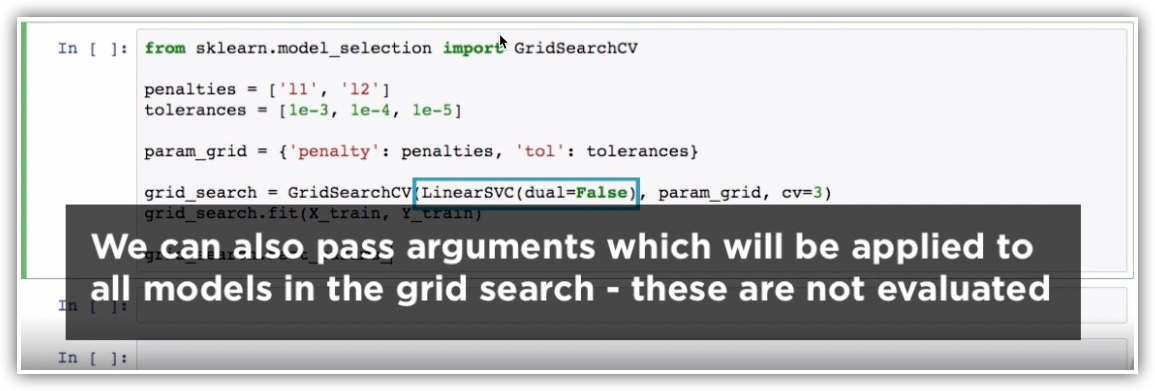

In [22]:
'''
When we instantiate our LinearSVC estimator which is going to be trained with various combinations of 

the parameters that we've specified in the grid, we can also pass in other arguments, 

which will remain constant during training.

'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Machine Learning Models in Python with scikit-learn/Image/2021-11-03_16-05-38.jpg')

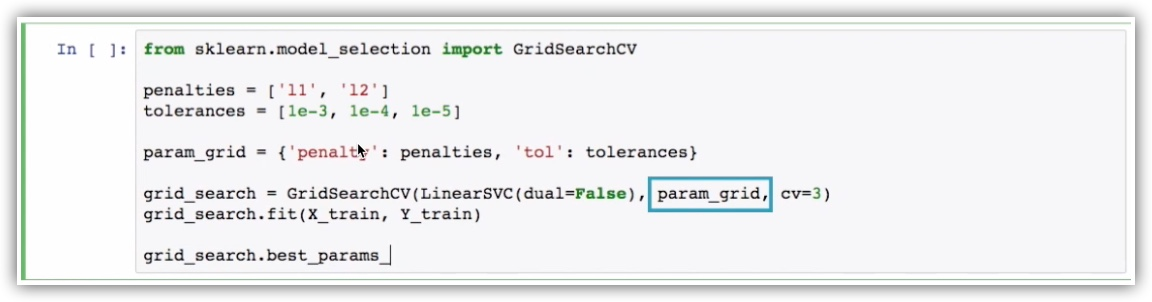

In [23]:
'''
The second argument to our GridSearchCV is the grid which contains our hyperparameter values.

GridSearchCV will now run training on our data with every possible model parameter combination.
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Machine Learning Models in Python with scikit-learn/Image/2021-11-03_16-06-09.jpg')

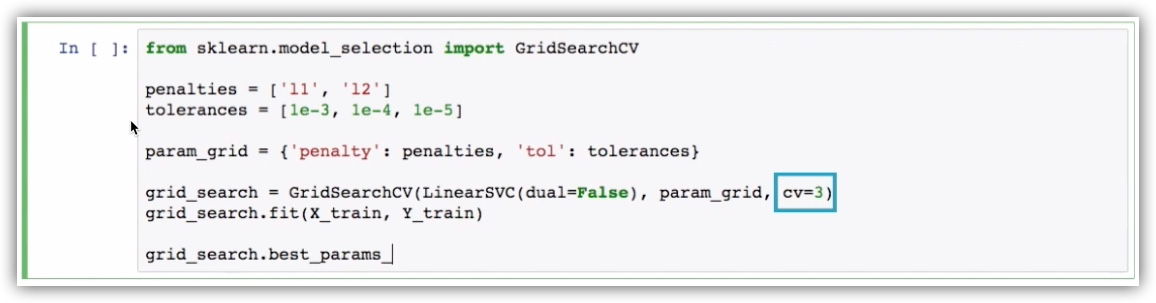

In [24]:
'''
The CV parameter specifies that we want this model to be cross validated to mitigate over fitting. 

CV is equal to three means that the input data set will be divided into 3 different parts. 

This is threefold cross validation. 

The training data will be two out of three parts and the validation data will be the third part. 
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Machine Learning Models in Python with scikit-learn/Image/2021-11-03_16-06-38.jpg')

In [ ]:
'''
One thing you ought to be aware of though is that GridSearchCV can take a very long time 

because it has to train many different models to find the best possible one, 

it can take a while. This particular grid search took about 35 minutes on my machine.


Grid Search will spit out the best possible model parameters. 

The penalty should be the L1 norm and the tolerance should be 0. 001. 
'''
grid_search.best_params_

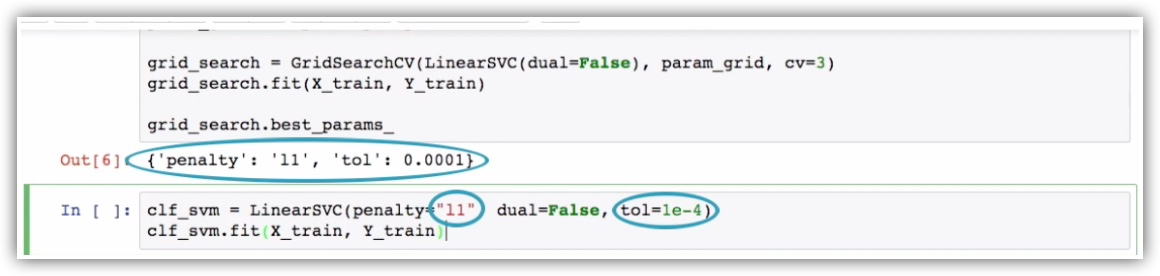

In [25]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Machine Learning Models in Python with scikit-learn/Image/2021-11-03_16-14-40.jpg')

In [26]:
'''
We will now use the parameters found by grid search to instantiate our linear SVC estimator. 
'''
clf_svm=LinearSVC(penalty='l1',dual=False,tol=0.001)
clf_svm.fit(X_train,Y_train)

LinearSVC(dual=False, penalty='l1', tol=0.001)

In [27]:
'''
Run training on the model and then measure the accuracy of our predictions on test data. 
When you get the accuracy number you will see that it is around 91. 19%. 
Marginally better than the 91. 02% accuracy that we got earlier.
'''
y_pred_svm=clf_svm.predict(X_test)
acc_svm=accuracy_score(y_test,y_pred_svm)
acc_svm

0.9116666666666666